In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mca import MCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from itertools import product
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean
import tensorflow as tf

/home/joel/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
plt.style.use("ggplot")

## Import the data

In [3]:
IND_a= pd.read_csv("../Datasets/Philippines_2021_access.csv")
IND_u= pd.read_csv('../Datasets/Philippines_2021_usage.csv')
y= IND_a['fin34a'].copy()
IND_a= IND_a.drop('fin34a', axis=1)
IND_u= IND_u.drop('fin34a', axis=1)

In [4]:
y.value_counts(normalize=True)

0    0.763
1    0.237
Name: fin34a, dtype: float64

In [5]:
IND_a.columns

Index(['female', 'age', 'educ', 'inc_q', 'account_fin', 'account_mob', 'fin2',
       'fin7', 'fin1_1a', 'fin1_1b', 'mobileowner', 'internetaccess'],
      dtype='object')

In [6]:
contingency_table = pd.crosstab(IND_a['educ'], IND_a['age'])
contingency_table

age,15-24,25-34,35-44,45-54,55-64,65+
educ,,,,,,
primary,47,35,25,24,11,6
secondary,207,173,107,60,22,7
tertiary,38,116,73,24,16,9


In [7]:
IND_a= IND_a.drop(columns= IND_a.columns[:4])
IND_u= IND_u.drop(columns= IND_u.columns[:4])

## Implementing MCA

In [8]:
encoder = OneHotEncoder()

# Fitting and transforming the data
one_hot_encoded_IND_access = encoder.fit_transform(IND_a)

# Converting the sparse matrix to a dense numpy array and adding the weight column
final_data = pd.concat([pd.DataFrame(one_hot_encoded_IND_access.toarray())], axis=1)
# Printing the final one-hot encoded data
mca_IND_a = MCA(final_data, benzecri= False)

In [9]:
transformed_data= mca_IND_a.fs_r()

In [10]:
IND_a_index = pd.DataFrame()

# fill the dataframe with the values from the transformed data
for i in range(transformed_data.shape[1]):
    col_name = f"aPC{i+1}"
    IND_a_index[col_name] = transformed_data[:, i]

In [11]:
IND_a_index

,aPC1,aPC2,aPC3,aPC4,aPC5,aPC6,aPC7
0,-0.936403,-0.071111,-0.598019,0.177692,-0.097378,0.229954,-0.447467
1,-0.149882,0.208203,0.006381,0.257579,0.181853,-0.000492,0.156484
2,-0.070239,-0.008320,-0.108611,-0.818064,-0.271063,-1.010325,0.255614
3,-0.936403,-0.071111,-0.598019,0.177692,-0.097378,0.229954,-0.447467
4,0.740403,-0.138791,0.042929,0.181927,0.000708,0.037081,0.152956
...,...,...,...,...,...,...,...
995,-0.951688,-0.081862,0.215396,-0.027714,0.548984,0.113574,-0.337391
996,-0.668053,-0.073439,0.187915,0.065051,0.494498,0.204644,-0.427122
997,0.740403,-0.138791,0.042929,0.181927,0.000708,0.037081,0.152956
998,-0.792664,0.282622,0.132371,0.123736,0.573443,-0.051709,0.277913


In [12]:
final_data = pd.get_dummies(IND_u)
# Printing the final one-hot encoded data
mca_IND_u = MCA(final_data, benzecri= False)
transformed_data= mca_IND_u.fs_r()
IND_u_index = pd.DataFrame()

# fill the dataframe with the values from the transformed data
for i in range(transformed_data.shape[1]):
    col_name = f"uPC{i+1}"
    IND_u_index[col_name] = transformed_data[:, i]
IND_u_index

,uPC1,uPC2,uPC3,uPC4,uPC5,uPC6,uPC7,uPC8,uPC9,uPC10,uPC11,uPC12,uPC13,uPC14,uPC15,uPC16,uPC17,uPC18,uPC19,uPC20
0,-0.807293,-0.171130,-0.293060,0.326412,-0.151117,0.025734,0.028215,-0.195183,-0.014775,0.134193,0.073257,0.091050,0.078475,-0.163874,0.287432,0.023654,0.068894,0.186844,-0.150985,-0.084382
1,-0.168513,0.178683,0.090880,0.305216,0.168223,-0.118635,-0.252028,0.157648,0.096807,-0.291705,0.100499,0.093562,0.012458,-0.187392,-0.094165,0.075242,0.086742,0.181387,-0.006848,0.267761
2,-0.161297,-0.203207,-0.474616,0.132429,0.165097,0.101677,0.164375,0.166026,-0.348032,-0.055755,0.026584,-0.240896,-0.243331,0.167166,-0.141011,0.181246,-0.045483,-0.371411,0.220191,0.199341
3,-0.773536,-0.169294,-0.378847,0.028884,-0.056503,-0.396332,-0.049955,0.233667,0.044121,-0.070536,0.015243,0.003540,-0.189897,0.170326,0.247978,0.202760,0.029992,0.152573,-0.156400,-0.078507
4,0.475043,-0.107484,0.084064,0.293471,-0.070342,0.087430,-0.012618,-0.027707,-0.053086,0.043157,-0.056973,-0.045808,-0.037354,-0.018713,-0.083562,-0.005509,0.052597,-0.012530,0.004205,-0.036260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.653288,-0.091433,0.070836,-0.459866,-0.158693,0.428029,0.032842,-0.084660,-0.237134,0.330493,-0.106988,-0.095356,0.286854,0.039324,0.065686,0.050623,0.014289,0.106922,-0.337327,-0.089143
996,-0.550676,-0.176328,-0.073049,-0.386718,0.236250,-0.291293,-0.033296,0.211451,-0.098912,0.017950,-0.147891,0.122666,-0.006702,0.109307,-0.226403,-0.136799,0.193934,0.109763,-0.045217,-0.122571
997,0.196671,-0.240694,0.235003,-0.008266,-0.369702,-0.094267,0.032675,0.142186,0.092068,-0.140856,-0.035720,-0.022408,-0.072048,0.141518,-0.198398,0.075102,0.064431,0.057898,0.001507,0.072798
998,-0.427479,-0.217311,-0.172792,-0.348097,-0.014674,0.036880,-0.103979,0.378577,-0.036332,0.023256,-0.102064,-0.144742,-0.062831,0.195000,0.171466,-0.022754,0.018669,0.109718,0.031501,0.103607


In [13]:
X = pd.concat([IND_a_index, IND_u_index], axis=1)
X

,aPC1,aPC2,aPC3,aPC4,aPC5,aPC6,aPC7,uPC1,uPC2,uPC3,...,uPC11,uPC12,uPC13,uPC14,uPC15,uPC16,uPC17,uPC18,uPC19,uPC20
0,-0.936403,-0.071111,-0.598019,0.177692,-0.097378,0.229954,-0.447467,-0.807293,-0.171130,-0.293060,...,0.073257,0.091050,0.078475,-0.163874,0.287432,0.023654,0.068894,0.186844,-0.150985,-0.084382
1,-0.149882,0.208203,0.006381,0.257579,0.181853,-0.000492,0.156484,-0.168513,0.178683,0.090880,...,0.100499,0.093562,0.012458,-0.187392,-0.094165,0.075242,0.086742,0.181387,-0.006848,0.267761
2,-0.070239,-0.008320,-0.108611,-0.818064,-0.271063,-1.010325,0.255614,-0.161297,-0.203207,-0.474616,...,0.026584,-0.240896,-0.243331,0.167166,-0.141011,0.181246,-0.045483,-0.371411,0.220191,0.199341
3,-0.936403,-0.071111,-0.598019,0.177692,-0.097378,0.229954,-0.447467,-0.773536,-0.169294,-0.378847,...,0.015243,0.003540,-0.189897,0.170326,0.247978,0.202760,0.029992,0.152573,-0.156400,-0.078507
4,0.740403,-0.138791,0.042929,0.181927,0.000708,0.037081,0.152956,0.475043,-0.107484,0.084064,...,-0.056973,-0.045808,-0.037354,-0.018713,-0.083562,-0.005509,0.052597,-0.012530,0.004205,-0.036260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.951688,-0.081862,0.215396,-0.027714,0.548984,0.113574,-0.337391,-0.653288,-0.091433,0.070836,...,-0.106988,-0.095356,0.286854,0.039324,0.065686,0.050623,0.014289,0.106922,-0.337327,-0.089143
996,-0.668053,-0.073439,0.187915,0.065051,0.494498,0.204644,-0.427122,-0.550676,-0.176328,-0.073049,...,-0.147891,0.122666,-0.006702,0.109307,-0.226403,-0.136799,0.193934,0.109763,-0.045217,-0.122571
997,0.740403,-0.138791,0.042929,0.181927,0.000708,0.037081,0.152956,0.196671,-0.240694,0.235003,...,-0.035720,-0.022408,-0.072048,0.141518,-0.198398,0.075102,0.064431,0.057898,0.001507,0.072798
998,-0.792664,0.282622,0.132371,0.123736,0.573443,-0.051709,0.277913,-0.427479,-0.217311,-0.172792,...,-0.102064,-0.144742,-0.062831,0.195000,0.171466,-0.022754,0.018669,0.109718,0.031501,0.103607


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

## Logistic regression

In [15]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights= [.01* i for i in range(1, 101)]
weights= list(product(weights, weights))

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0: x[0], 1:x[1]} for x in weights], 
              'C': [i for i in range(1,100)]}

#Fitting grid search to the train data with 5 folds
grid_search = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 990000 candidates, totalling 4950000 fits


In [16]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'C': 7, 'class_weight': {0: 0.7000000000000001, 1: 1.0}}
Best score: 0.841770327785445


In [17]:
best_lr_model = LogisticRegression(**grid_search.best_params_)
best_lr_model.fit(X_train, y_train)

proba = best_lr_model.predict_proba(X_test)

auc1 = roc_auc_score(y_test, proba[:,1], multi_class='auto')
print('AUC:', auc1)

# Calculate precision, recall, and F1-score
target_names = ["0", "1"]
y_pred = best_lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

AUC: 0.9653679653679653
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       187
           1       0.78      0.86      0.82        63

    accuracy                           0.90       250
   macro avg       0.87      0.89      0.88       250
weighted avg       0.91      0.90      0.91       250



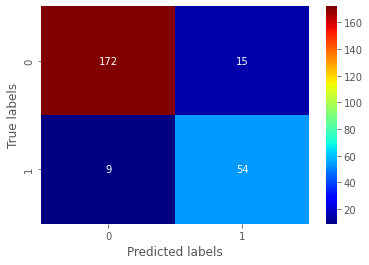

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="jet")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [19]:
y_= proba[:,1]

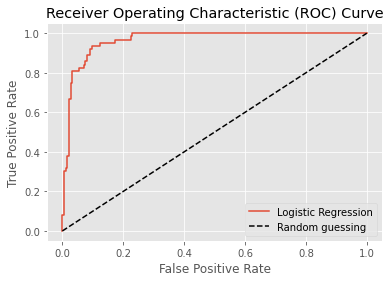

In [20]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_)

# plot the ROC curve
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color= "k", label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [21]:
accuracy_score(y_test, y_pred)

0.904

In [22]:
param_grid = {
    'n_estimators': [i for i in range(90, 111)],
    'max_depth': [i for i in range(10, 11)],
    'min_samples_split': [i for i in range(2, 3)],
    'min_samples_leaf': [i for i in range(1,2)],
    'max_features': ['sqrt'],
    'class_weight': [{0: x[0], 1:x[1]} for x in weights]
}
rf = RandomForestClassifier(random_state= 42)

In [23]:
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv= 5, 
                           scoring='f1', 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
proba= best_rf.predict_proba(X_test)
print(f'Best hyperparameters: {grid_search.best_params_}')
print('Best score:', grid_search.best_score_)

KeyboardInterrupt: 

In [ ]:
auc2 = roc_auc_score(y_test, proba[:,1], multi_class='auto')
print('AUC:', auc2)
target_names = ["0", "1"]
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="jet")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
y_=proba[:,1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_)

# plot the ROC curve
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, label='Random Forest (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], linestyle='--', color= "k", label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

In [ ]:
y_ = model.predict(X_test)

In [ ]:
y_= y_.reshape(251,)

In [ ]:
y_pred= np.array([round(i) for i in y_])

In [ ]:
auc3 = roc_auc_score(y_test, y_, multi_class='auto')
print('AUC:', auc3)
target_names = ["0", "1"]
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="jet")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
fpr3, tpr3, thresholds = roc_curve(y_test, y_)

# plot the ROC curve
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % auc1)
plt.plot(fpr3, tpr3, label='Artificial Neural Network (area = %0.2f)' % auc3)
plt.plot([0, 1], [0, 1], linestyle='--', color= "k", label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()